In [76]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [77]:
sella = pd.read_csv('../data/Sample_consel.csv', sep=';', quotechar="'") # import data 
sella.shape

(24110, 60)

In [78]:
sella.head()

DEFAULT  DEFAULT_AMOUNT  LOAN_AMOUNT  LOAN_INSTALMENT_AMOUNT  LOAN_NUMBER  \
0        0               0          610                      54      3051065   
1        0               0         1001                     166      2900179   
2        0               0          212                      38      2822295   
3        0               0          385                      64      2900451   
4        0               0          739                     128      2840121   

   LOAN_NUMBER_OF_INSTALMENTS  LOAN_RATING     LOAN_STATE LOAN_IRREGULARITY  \
0                          12            6  FINANCED_LOAN      Nessuna nota   
1                           6            9  FINANCED_LOAN      Nessuna nota   
2                           6            9  FINANCED_LOAN      Nessuna nota   
3                           6            9  FINANCED_LOAN      Nessuna nota   
4                           6            9  FINANCED_LOAN      Nessuna nota   

   LOAN_SYSTEM_ACCEPT       ...        CUSTOMER_EMPLOYER_CAP_CODE  \
0                   1       ...                             70017   
1                   1       ...                             90100   
2                   1       ...                             10100   
3                   0       ...                             80038   
4                   1       ...                             16100   

  RULE_EMAIL_OTHER_CONTRACT  RULE_NOT_REGISTERED_FOREIGN  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   RULE_TELEF_DOC_ALTRA_PRT  T_CREDIT_CARD_GRANTED   T_CREDIT_CARD_EXTINCT  \
0                         0                       1                      0   
1                         0                       0                      0   
2                         0                       1                      0   
3                         0                       2                      0   
4                         0                       0                      2   

   T_CREDIT_CARD_REJECTED  T_NR_RESIDENCE  T_PERFORM  T_NOTIFICATION  
0                       0               2        565               1  
1                       0               0        478               0  
2                       0               5        520               5  
3                       0               1        531               3  
4                       0              12        571               5  

[5 rows x 60 columns]

In [79]:
sella_cap_ip = pd.read_csv('../data/geolocalized_loans.csv', sep=',')
sella_cap_ip = sella_cap_ip.ix[:,['LOAN_NUMBER','IP_COUNTRY','IP_EQ_RES','EMP_EQ_RES','IP_EQ_EMP']]

sella_cap_ip.shape

(24110, 5)

In [80]:
sella = pd.merge(sella, sella_cap_ip, how ='left', on='LOAN_NUMBER')

In [81]:
# remove duplicates
sella = sella.drop_duplicates("LOAN_NUMBER")  

In [82]:
sella.shape

(24110, 64)

In [83]:
# set contract_number as index (not features)
sella = sella.set_index('LOAN_NUMBER')

In [7]:
list(sella) 

['DEFAULT',
 'DEFAULT_AMOUNT',
 'LOAN_AMOUNT',
 'LOAN_INSTALMENT_AMOUNT',
 'LOAN_NUMBER_OF_INSTALMENTS',
 'LOAN_RATING',
 'LOAN_STATE',
 'LOAN_IRREGULARITY',
 'LOAN_SYSTEM_ACCEPT',
 'LOAN_SYSTEM_REJECT',
 'LOAN_DATE',
 'ALERT_14',
 'ALERT_15',
 'ALERT_46',
 'ALERT_55',
 'ALERT_61',
 'ALERT_62',
 'ALERT_64',
 'ALERT_69',
 'ALERT_72',
 'ALERT_74',
 'ALERT_77',
 'ALERT_84',
 'ALERT_87',
 'ALERT_88',
 'ALERT_90',
 'ALERT_91',
 'ALERT_92',
 'ALERT_93',
 'ALERT_94',
 'CUSTOMER_HOUSING',
 'CUSTOMER_SENIORITY_ADDRESS',
 'CUSTOMER_SENIORITY_EMPLOY',
 'CUSTOMER_CODE',
 'CUSTOMER_AGE',
 'CUSTOMER_NATIONALITY_AREA',
 'CUSTOMER_COUNTRY_RESIDENCE',
 'CUSTOMER_EMPLOY',
 'CUSTOMER_MARITAL_STATUS',
 'CUSTOMER_PHONE_NUMBER',
 'CUSTOMER_PHONE_NUMBER_2',
 'CUSTOMER_MOBILE_NUMBER',
 'CUSTOMER_BANK_ABI',
 'CUSTOMER_BANK_CAB',
 'CUSTOMER_EMAIL',
 'CUSTOMER_COUNTRY_RELEASE_IDEN_CARD',
 'CUSTOMER_CAP_CODE',
 'CUSTOMER_EMPLOYER_COUNTRY_RESIDENCE',
 'CUSTOMER_EMPLOYER_PHONE_NUMBER',
 'CUSTOMER_EMPLOYER_CAP_CODE'

In [8]:
sella['LOAN_STATE'].value_counts()

FINANCED_LOAN    19309
RETRAED_LOAN      3221
REJECT_LOAN       1580
dtype: int64

In [10]:
# Drop rejected loan
sella = sella[sella.LOAN_STATE != 'REJECT_LOAN']

In [11]:
# Drop retried loan
sella = sella[sella.LOAN_STATE != 'RETRAED_LOAN']

In [13]:
#Add COUNTER BY CUSTOMER CODE
sella['count']  = sella.groupby(['CUSTOMER_CODE'])['CUSTOMER_CODE'].transform('count').astype('int')

In [14]:
# drop variables
sella.drop('DEFAULT_AMOUNT', axis=1, inplace=True)

In [15]:
# check missing
sella.isnull().sum()

DEFAULT                                    0
LOAN_AMOUNT                                0
LOAN_INSTALMENT_AMOUNT                     0
LOAN_NUMBER_OF_INSTALMENTS                 0
LOAN_RATING                                0
LOAN_STATE                                 0
LOAN_IRREGULARITY                          0
LOAN_SYSTEM_ACCEPT                         0
LOAN_SYSTEM_REJECT                         0
LOAN_DATE                                  0
ALERT_14                                   0
ALERT_15                                   0
ALERT_46                                   0
ALERT_55                                   0
ALERT_61                                   0
ALERT_62                                   0
ALERT_64                                   0
ALERT_69                                   0
ALERT_72                                   0
ALERT_74                                   0
ALERT_77                                   0
ALERT_84                                   0
ALERT_87  

In [16]:
# T_perform quando missin la metto = 0 (scala va da rating basso a alto)
sella['T_PERFORM'][sella['T_PERFORM'].isnull()] = 0

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


## Descriptive stats

### DEFAULT

In [17]:
sella['DEFAULT'].value_counts()  #221 frodatori

0    19088
1      221
dtype: int64

### COUNT

In [18]:
sella['customer_status'].value_counts()

0    15003
1     4306
dtype: int64

In [19]:
sella.groupby('count')['DEFAULT'].value_counts()

count   
1      0    14825
       1      178
2      0     3206
       1       28
3      0      781
       1       14
4      0      167
       1        1
5      0       50
6      0       36
7      0       14
9      0        9
dtype: int64

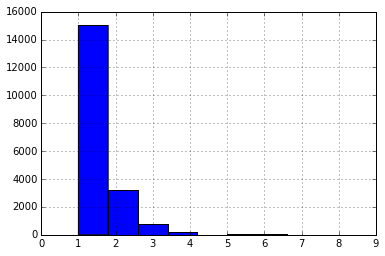

In [20]:
sella['count'].hist()

### LOAN AMOUNT

In [21]:
sella.groupby(['DEFAULT'])['LOAN_AMOUNT'].describe()

DEFAULT       
0        count    19088.000000
         mean       778.470348
         std        588.116888
         min        134.000000
         25%        419.000000
         50%        609.000000
         75%        936.250000
         max       7950.000000
1        count      221.000000
         mean      1132.081448
         std        904.516276
         min        170.000000
         25%        706.000000
         50%        929.000000
         75%       1000.000000
         max       6237.000000
dtype: float64

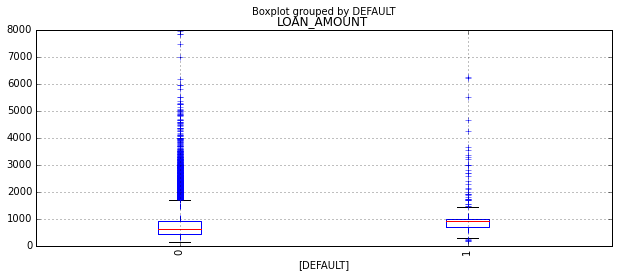

In [22]:
sella.boxplot('LOAN_AMOUNT', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

In [23]:
from scipy import stats

loan0 = sella[sella.DEFAULT==0]['LOAN_AMOUNT']
loan1 = sella[sella.DEFAULT==1]['LOAN_AMOUNT']

t_stat, p_value = stats.ttest_ind(loan1,loan0, equal_var=False) # Welch’s t-test
print t_stat, p_value

5.79756146506 2.29194917146e-08


In [ ]:
#kolmogrov-smirnov => distribution 
#stats.k

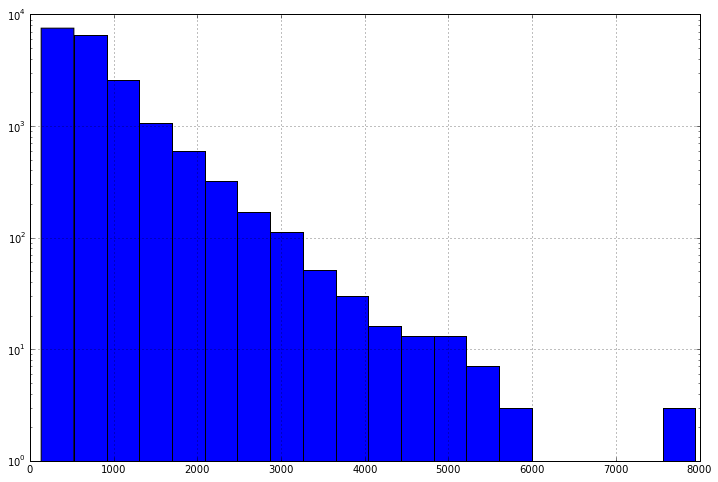

In [26]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)


h = loan0.hist(bins=20)  #logatitrmo np.bin
ax.set_yscale('log')
plt.show()

In [27]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
h = loan1.hist(bins=20)
ax.set_yscale('log')
plt.show()

## LOAN_INSTALMENT_AMOUNT

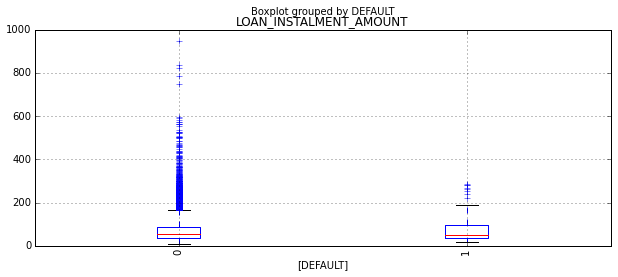

In [24]:
sella.boxplot('LOAN_INSTALMENT_AMOUNT', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

##LOAN_NUMBER_OF_INSTALMENTS

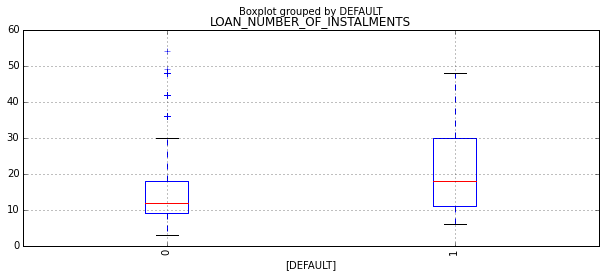

In [25]:
sella.boxplot('LOAN_NUMBER_OF_INSTALMENTS', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

## LOAN_IRREGULARITY

In [26]:
sella.groupby('LOAN_IRREGULARITY')['DEFAULT'].value_counts()

LOAN_IRREGULARITY                                     
B1-BENE NON CONSEGNATO                               1        9
B4-BENE NON CONSEGNATO CON QUERELA/DENUNCIA          1        1
C6-CLIENTE DISCONOSCE FINANZIAMENTO                  1       13
C8-CLT DISCONOSCE FIN.TO CON QUERELA/DENUNCIA        1       15
C8-CLT DISCONOSCE FIN.TO CON QUERELA/DENUNCIA/RECLA  1        1
F1-FURTO DI IDENTITA NON SEGNALATO DA CLIENTE'       1        2
Nessuna nota                                         0    19088
                                                     1      172
V3-DOCUMENTI NON CONFORMI                            1        8
dtype: int64

## E-MAIL

In [27]:
mail_miss = sella[sella['CUSTOMER_EMAIL'].isnull()]  

In [28]:
mail_miss['DEFAULT'].value_counts()  #105 NN FRAUD, 1 FRAUD

0    105
1      1
dtype: int64

In [30]:
loan1 = sella[sella.DEFAULT==1]
loan1['CUSTOMER_EMAIL'].value_counts()

libero.it               63
gmail.com               37
tiscali.it              34
hotmail.it              27
yahoo.it                10
alice.it                 9
hotmail.com              7
virgilio.it              5
yahoo.com                5
live.it                  4
outlook.it               4
msn.com                  2
email.it                 2
katamail.com             2
icloud.com               1
yahoo.it  bubovive73     1
eutelia.com              1
interfree.it             1
live.com                 1
rcs.it                   1
vodafone.it              1
inwind.it                1
afmstore.it              1
dtype: int64

In [29]:
loan0 = sella[sella.DEFAULT==0]
loan0['CUSTOMER_EMAIL'].value_counts()

gmail.com        5148
libero.it        3291
alice.it         1779
hotmail.it       1727
yahoo.it         1213
tiscali.it       1132
hotmail.com       584
virgilio.it       535
live.it           477
tin.it            357
fastwebnet.it     297
yahoo.com         187
inwind.it         170
email.it          157
vodafone.it        84
...
pebfrutta.com           1
studiogiovinazzo.com    1
accaeffe.it             1
dadalt.it               1
beniculturali.it        1
tntitaly.it             1
framing.it              1
trenitalia.it           1
gallisaj.com            1
markupint.com           1
ettorevotta.it          1
enzosantoro.com         1
nesmed.it               1
htmail.it               1
d-one.it                1
Length: 997, dtype: int64

## RATING CRIF

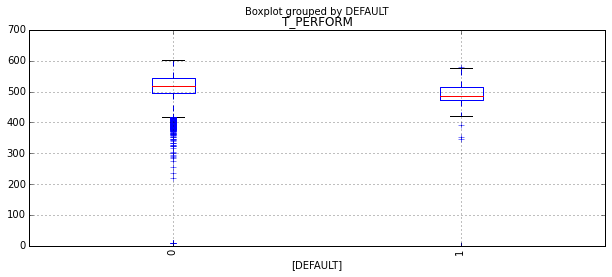

In [31]:
sella.boxplot('T_PERFORM', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

##CUSTOMER_AGE

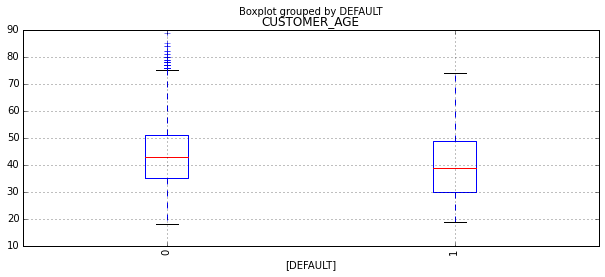

In [32]:
sella.boxplot('CUSTOMER_AGE', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

## LOAN_DATE

In [34]:
import datetime

sella['LOAN_DATE2'] = np.array([datetime.datetime.strptime(x, "%Y-%m-%d").date()
                                 for x in sella['LOAN_DATE']])

In [35]:
sella['WEEKDAY'] = sella.LOAN_DATE2.apply(lambda x: x.isoweekday())

In [36]:
sella.WEEKDAY.value_counts()

1    3634
2    3208
4    3023
3    2960
5    2902
6    2014
7    1568
dtype: int64

In [37]:
sella['WEEKDAY'][sella.DEFAULT==True].hist(bins=7)

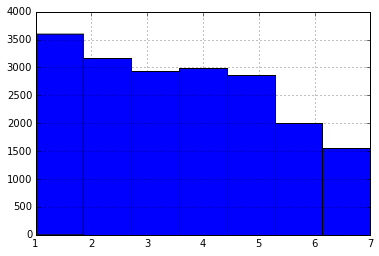

In [38]:
sella['WEEKDAY'][sella.DEFAULT==False].hist(bins=7)

## MATRICE CORRELAZIONE

In [44]:
from matplotlib import pyplot
pyplot.matshow(sella.corr().ix[0:62])

In [45]:
correlations = sella.corr().ix[6:26]
correlations.sort()
correlations

DEFAULT  LOAN_AMOUNT  LOAN_INSTALMENT_AMOUNT  \
LOAN_SYSTEM_REJECT       NaN          NaN                     NaN   
ALERT_14           -0.021619     0.025110                0.027657   
ALERT_15           -0.029636     0.022405                0.032293   
ALERT_46            0.002097     0.006146               -0.011139   
ALERT_55            0.025946    -0.000696               -0.001976   
ALERT_61           -0.056767    -0.007563                0.005112   
ALERT_62            0.029299     0.011819                0.003988   
ALERT_64            0.040363    -0.003391               -0.043198   
ALERT_69            0.023527    -0.001954               -0.005993   
ALERT_72            0.031224     0.013191                0.013917   
ALERT_74           -0.012112     0.003780                0.010613   
ALERT_77            0.010010     0.005527               -0.003491   
ALERT_84            0.016797    -0.006667               -0.024534   
ALERT_87            0.015596     0.007366               -0.002166   
ALERT_88           -0.054783     0.002305                0.012551   
ALERT_90           -0.007113     0.002410               -0.000774   
ALERT_91            0.003014    -0.006712               -0.006262   
ALERT_92           -0.008536    -0.005006               -0.015370   
ALERT_93           -0.003523     0.011105                0.012712   
ALERT_94            0.034596     0.000181               -0.023160   

                    LOAN_NUMBER_OF_INSTALMENTS  LOAN_RATING  \
LOAN_SYSTEM_REJECT                         NaN          NaN   
ALERT_14                             -0.015892     0.029224   
ALERT_15                             -0.027543     0.074073   
ALERT_46                              0.023940    -0.005775   
ALERT_55                             -0.001088     0.005873   
ALERT_61                             -0.033190     0.251275   
ALERT_62                              0.002375    -0.007321   
ALERT_64                              0.077622    -0.104767   
ALERT_69                             -0.000915    -0.012083   
ALERT_72                              0.003823    -0.030030   
ALERT_74                             -0.000358     0.049951   
ALERT_77                              0.010889     0.006327   
ALERT_84                              0.029849    -0.021876   
ALERT_87                              0.005559    -0.008775   
ALERT_88                             -0.015861     0.179868   
ALERT_90                              0.011838    -0.005284   
ALERT_91                             -0.003536    -0.000198   
ALERT_92                              0.026638     0.041966   
ALERT_93                             -0.001995     0.047378   
ALERT_94                              0.045193    -0.011823   

                    LOAN_SYSTEM_ACCEPT  LOAN_SYSTEM_REJECT  ALERT_14  \
LOAN_SYSTEM_REJECT                 NaN                 NaN       NaN   
ALERT_14                     -0.013596                 NaN  1.000000   
ALERT_15                     -0.000038                 NaN  0.389692   
ALERT_46                      0.004380                 NaN  0.012789   
ALERT_55                     -0.002064                 NaN -0.002754   
ALERT_61                      0.022481                 NaN -0.057705   
ALERT_62                     -0.093935                 NaN -0.000827   
ALERT_64                     -0.124684                 NaN  0.003525   
ALERT_69                     -0.014409                 NaN  0.005545   
ALERT_72                      0.010206                 NaN  0.074354   
ALERT_74                      0.007354                 NaN  0.067518   
ALERT_77                      0.027769                 NaN -0.046528   
ALERT_84                     -0.027163                 NaN  0.006822   
ALERT_87                      0.004366                 NaN -0.004240   
ALERT_88                     -0.020416                 NaN  0.030432   
ALERT_90                     -0.079660                 NaN  0.006832   
ALERT_91               

##T_NOTIFICATION

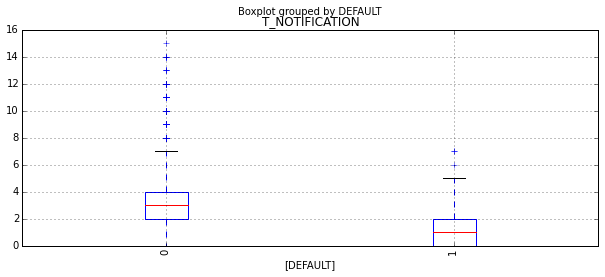

In [46]:
sella.boxplot('T_NOTIFICATION', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

## T_CREDIT_CARD_GRANTED

In [51]:
sella.boxplot('T_CREDIT_CARD_GRANTED ', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

## T_CREDIT_CARD_EXTINCT

In [55]:
sella.groupby('DEFAULT')['T_CREDIT_CARD_EXTINCT'].value_counts()

DEFAULT   
0        0    15436
         1     2972
         2      548
         3      100
         4       21
         5        7
         6        3
         7        1
1        0      206
         1       11
         2        4
dtype: int64

## T_CREDIT_CARD_REJECTED

In [56]:
sella.groupby('DEFAULT')['T_CREDIT_CARD_REJECTED'].value_counts()

DEFAULT   
0        0    19044
         1       31
1        0      220
         1        1
dtype: int64

## ALERT SUM

In [71]:
sella['ALERT'] =sella['ALERT_14']+ sella['ALERT_15']+ sella['ALERT_61']+ sella['ALERT_77']+ sella['ALERT_88'] +sella['ALERT_93']+sella['ALERT_94']+ sella['ALERT_64']+ sella['ALERT_69']+ sella['ALERT_72']+ sella['ALERT_84']+ sella['ALERT_92']
sella['ALERT'] = sella['ALERT']+sella['ALERT_55']+ sella['ALERT_62']+ sella['ALERT_74']+ sella['ALERT_87']+ sella['ALERT_90']+sella['ALERT_91']

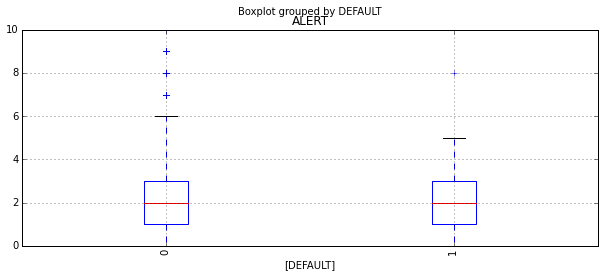

In [72]:
sella.boxplot('ALERT', by=['DEFAULT'], figsize=(10,4))  #group by suffered_fraud
xticks(rotation=90); 

## CUSTOMER PHONE OPERATOR

In [73]:
tim = list(map(str, (330, 331, 333, 334, 335, 336, 337, 338, 339, 360, 361, 362, 363, 366, 368, 385)))
vodafone = list(map(str, (340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 383)))
wind = list(map(str, (320, 322, 323, 324, 327, 328, 329, 380, 383, 388, 389)))
tre = list(map(str, (390, 391, 392, 393, 397)))
big4 = tim+vodafone+wind+tre

def phone_operator(digits):
    digits = str(digits)
    if digits=='nan': return None
    if digits[0]=='3':
        if digits[:3] in big4:
            return "mobile_big"
        else:
            return "mobile_strange"
    else:
        return "fixed"
sella['CUSTOMER_PHONE_OPERATOR'] = sella.CUSTOMER_PHONE_NUMBER.apply(phone_operator)

In [75]:
sella.groupby('DEFAULT')['CUSTOMER_PHONE_OPERATOR'].value_counts()

DEFAULT                
0        fixed             9807
         mobile_big        5772
         mobile_strange      55
1        mobile_big          86
         fixed               81
         mobile_strange       7
dtype: int64

## CUSTOMER IP

In [90]:
sella['IP_COUNTRY'].unique()

array(['Italy', nan, 'France', 'Brazil', 'Germany', 'Switzerland',
       'Tunisia', 'United States', 'Netherlands', 'China', 'Slovenia',
       'United Kingdom', 'Republic of the Congo', 'Morocco', 'Romania',
       'Qatar'], dtype=object)

In [85]:
sella.groupby('DEFAULT')['IP_COUNTRY'].value_counts()

DEFAULT                       
0        Italy                    12600
         United Kingdom              10
         Brazil                       6
         Germany                      6
         United States                5
         Switzerland                  2
         France                       2
         Netherlands                  2
         Republic of the Congo        1
         China                        1
         Tunisia                      1
         Romania                      1
         Slovenia                     1
         Qatar                        1
         Morocco                      1
1        Italy                      130
dtype: int64

In [87]:
sella.groupby('DEFAULT')['IP_EQ_RES'].value_counts()

DEFAULT       
0        False    5962
         True      629
1        False      66
         True        8
dtype: int64

In [88]:
sella.groupby('DEFAULT')['EMP_EQ_RES'].value_counts()

DEFAULT       
0        True     18173
         False     3955
1        True       173
         False       34
dtype: int64

In [89]:
sella.groupby('DEFAULT')['IP_EQ_EMP'].value_counts()

DEFAULT       
0        False    5501
         True      583
1        False      62
         True        6
dtype: int64